## CS589 - Machine Learning
# Assignment 5 - Probabilistic Learning

Adarsh Kolya  
Brinda Murulidhara  
Shubham Shetty

## Import Statements

In [136]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

## Load Data

In [137]:
## Training Data
X = np.loadtxt('x.csv')
Y = np.loadtxt('y.csv')

In [138]:
## Test Data
x = np.loadtxt('x_test.csv')
y = np.loadtxt('y_test.csv')

## Answer 1

In [139]:
def prior(m):
    p = {0: 0.2,
         1: 0.2,
         2: 0.2,
         3: 0.1,
         4: 0.1,
         5: 0.05,
         6: 0.05,
         7: 0.05,
         8: 0.025,
         9: 0.025}
    return p[m]

In [140]:
prior(3)

0.1

## Answer 2

In [141]:
def show_priors():
    for m in range(10):
        print("m", m, "prior(m)", prior(m))
        
    x = [0,1,2,3,4,5,6,7,8,9]
    y = [prior(m) for m in x]
    plt.bar(x, y, label="Priors Bar Chart")
    plt.xlabel("m")
    plt.ylabel("Prior")
    plt.xticks(np.arange(0, 10, 1))
    plt.show()

m 0 prior(m) 0.2
m 1 prior(m) 0.2
m 2 prior(m) 0.2
m 3 prior(m) 0.1
m 4 prior(m) 0.1
m 5 prior(m) 0.05
m 6 prior(m) 0.05
m 7 prior(m) 0.05
m 8 prior(m) 0.025
m 9 prior(m) 0.025


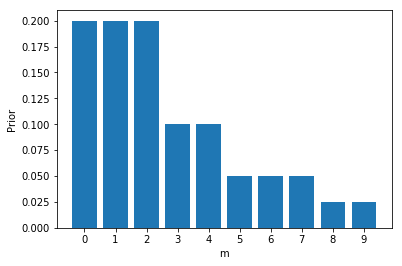

In [142]:
show_priors()

## Answer 3

In [143]:
def likelihood_single(x, y, m):
    mu = 0 if m == 0 else x ** m
    sigma = 0.1
    return norm.pdf(y, mu, sigma)

In [144]:
likelihood_single(0.13667977,0.04395448,1)
#2.5954180178203257

2.5954180178203257

## Answer 4

In [145]:
def likelihood(X,Y,m):
    p = np.product(np.array(list(map(lambda x,y: likelihood_single(x,y,m), X, Y))))
    return p

## Answer 5

In [146]:
X = np.loadtxt('x.csv')
Y = np.loadtxt('y.csv')

In [147]:
def plot_likelihood(X,Y):
    x = [0,1,2,3,4,5,6,7,8,9]
    y = [likelihood(X,Y,m) for m in x]
    plt.bar(x, y)
    plt.xlabel("m")
    plt.ylabel("Likelihood")
    plt.xticks(np.arange(0, 10, 1))
    plt.show()

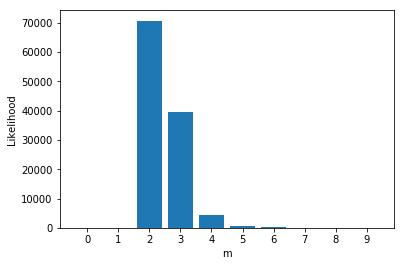

In [148]:
plot_likelihood(X,Y)

## Answer 7 

In [149]:
def posterior(X,Y,m):
    m_i = [0,1,2,3,4,5,6,7,8,9]
    normalizer = np.sum(np.array([prior(i)*likelihood(X,Y,i) for i in m_i]))
    p = (likelihood(X,Y,m)*prior(m))/normalizer
    return p

## Answer 8

In [150]:
def plot_posterior(X,Y):
    x = [0,1,2,3,4,5,6,7,8,9]
    y = [posterior(X,Y,m) for m in x]
    #sum_all = np.sum(np.array([posterior(X,Y,m) for m in x]))
    #print(sum_all)
    plt.bar(x, y)
    plt.xlabel("m")
    plt.ylabel("Posterior")
    plt.xticks(np.arange(0, 10, 1))
    #plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

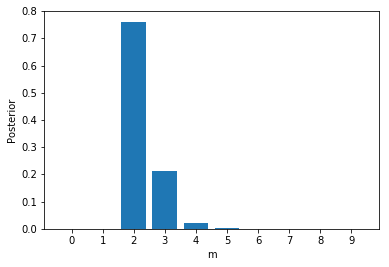

In [151]:
plot_posterior(X,Y)

## Answer 9

In [152]:
def MAP(X,Y):
    m_i = [0,1,2,3,4,5,6,7,8,9]
    p = [posterior(X,Y,i) for i in m_i]
    m = m_i[p.index(max(p))]
    return m

In [153]:
MAP(X,Y)

2

## Answer 10

In [155]:
print(f"m_map: {MAP(X,Y)}")
print(f"Posterior Probability: {posterior(X,Y,MAP(X,Y))}")

m_map: 2
Posterior Probability: 0.7610021202297498


## Answer 11

In [157]:
def predict_MAP(x,X,Y):
    m = MAP(X,Y)
    f = x ** m if m > 0 else 0
    return f

## Answer 12

In [158]:
# Test Data
x = np.loadtxt('x_test.csv')
y = np.loadtxt('y_test.csv')

In [159]:
def MAP_plot(X,Y,x_test,y_test):
    y_pred = list(map(lambda x:predict_MAP(x,X,Y), x_test))
    plt.scatter(x_test, y_test, marker="x", label="Test True Output")
    plt.scatter(x_test, y_pred, marker="o", label="Test Prediction Output")
    plt.xlabel("Test Input x")
    plt.ylabel("Test Output y")
    #plt.xticks(np.arange(0, 16, 1))
    plt.legend()
    plt.show()

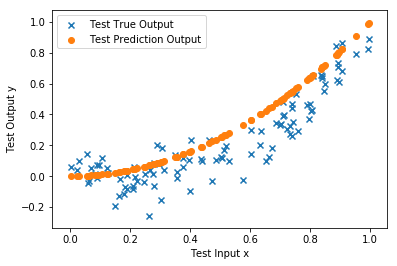

In [164]:
MAP_plot(X,Y,x,y)

## Answer 13

In [162]:
def MAP_MSE(X,Y,x_test,y_test):
    mse = np.sum(np.square((np.array(y_test) - np.array(list(map(lambda x:predict_MAP(x,X,Y), x_test))))))/100
    return mse

In [163]:
MAP_MSE(X,Y,x,y)

0.02146290417007275

## Answer 14

In [160]:
def f_m(x,m):
    # Predictor Function
    if m>0:
        return x**m
    else:
        return 0

In [161]:
def predict_Bayes(x,X,Y):
    m_i = [0,1,2,3,4,5,6,7,8,9]
    f = np.sum(np.array([posterior(X,Y,m)*f_m(x,m) for m in m_i]))
    return f

## Answer 15

In [165]:
def Bayes_plot(X,Y,x_test,y_test):
    y_pred = list(map(lambda x:predict_Bayes(x,X,Y), x_test))
    plt.scatter(x_test, y_test, marker="x", label="Test True Output")
    plt.scatter(x_test, y_pred, marker="o", label="Test Prediction Output")
    plt.xlabel("Test Input x")
    plt.ylabel("Test Output y")
    #plt.xticks(np.arange(0, 16, 1))
    plt.legend()
    plt.show()

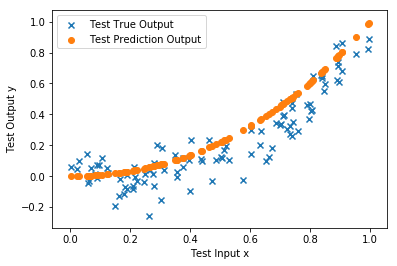

In [166]:
Bayes_plot(X,Y,x,y)

## Answer 16

In [167]:
def Bayes_MSE(X,Y,x_test,y_test):
    mse = np.sum(np.square((np.array(y_test) - np.array(list(map(lambda x:predict_Bayes(x,X,Y), x_test))))))/100
    return mse

In [168]:
Bayes_MSE(X,Y,x,y)

0.01635700904708008

## Rough

In [169]:
def all_plot(X,Y,x_test,y_test):
    y_pred_bayes = list(map(lambda x:predict_Bayes(x,X,Y), x_test))
    y_pred_map = list(map(lambda x:predict_MAP(x,X,Y), x_test))
    plt.scatter(x_test, y_test, marker="x", label="Test True Output")
    plt.scatter(x_test, y_pred_bayes, marker="o", label="Test Bayes Prediction Output")
    plt.scatter(x_test, y_pred_map, marker="^", label="Test MAP Prediction Output")
    plt.xlabel("Test Input x")
    plt.ylabel("Test Output y")
    #plt.xticks(np.arange(0, 16, 1))
    plt.legend()
    plt.show()

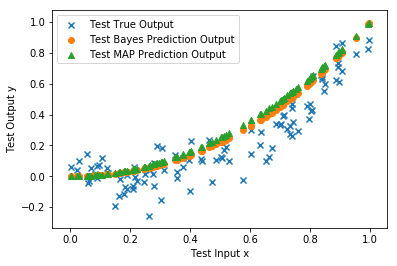

In [170]:
all_plot(X,Y,x,y)